The problem is of classification type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
customer_data.shape

(7043, 21)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here it can be seen that most of the data type is 'object'. For model building it needs to be converted into integer or float.

In [5]:
# checking for the null values in the dataset:

customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So there are no null vaues in our dataset. However we need to check all column values whether they are valid or not.

In [6]:
# checking the tabular form of the data:

customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
import matplotlib.ticker as mtick

In [9]:
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

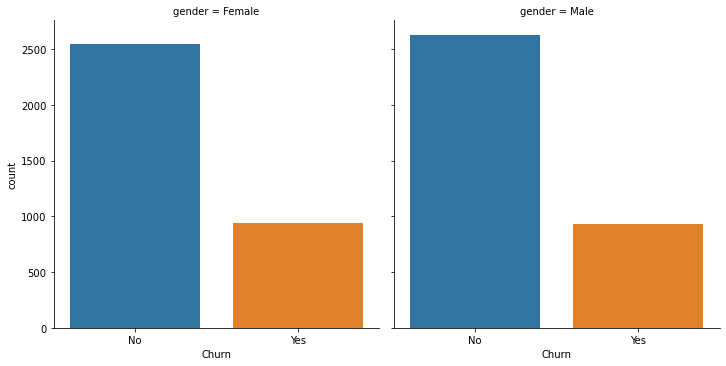

In [10]:
sns.factorplot(x='Churn',col='gender',kind='count',data=customer_data)

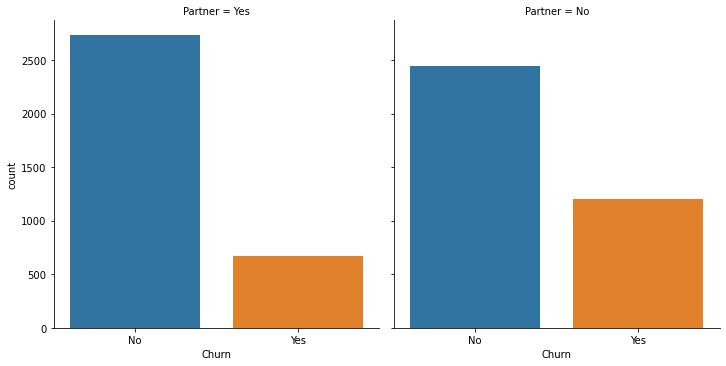

In [13]:
sns.factorplot(x='Churn',col='Partner',kind='count',data=customer_data)

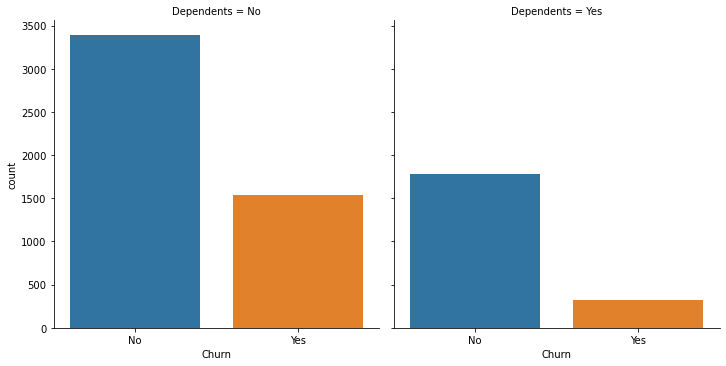

In [15]:
sns.factorplot(x='Churn',col='Dependents',kind='count',data=customer_data)

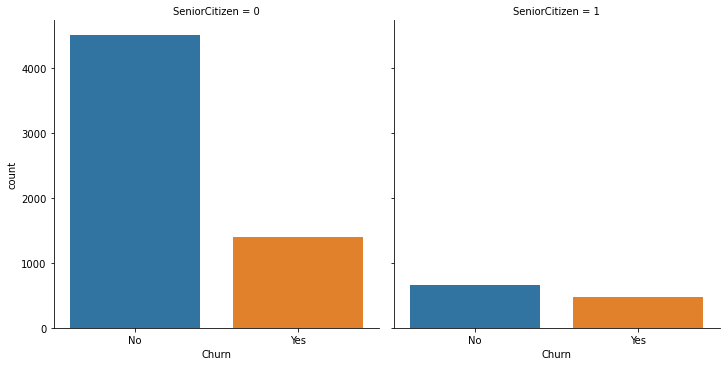

In [16]:
sns.factorplot(x='Churn',col='SeniorCitizen',kind='count',data=customer_data)

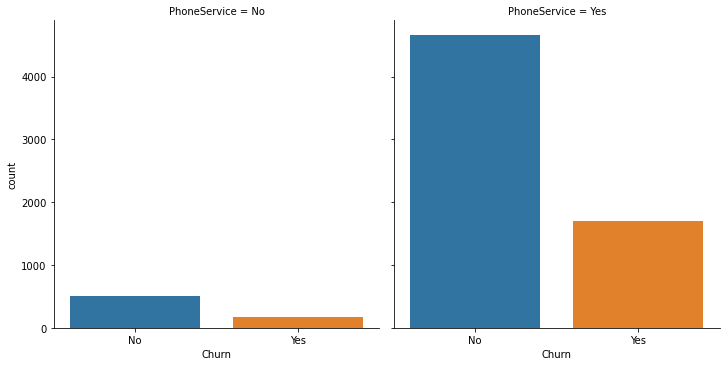

In [17]:
sns.factorplot(x='Churn',col='PhoneService',kind='count',data=customer_data)

Text(0, 0.5, 'Target Variable')

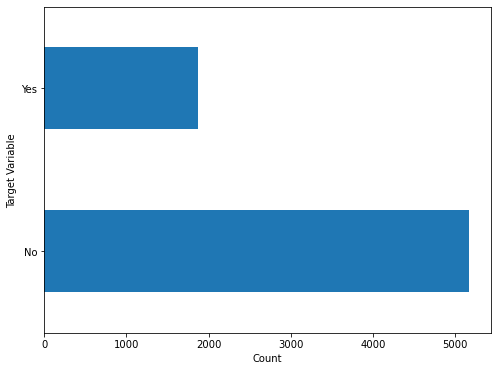

In [18]:
customer_data['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Target Variable")

Now, from our dataset we can see that Customerid is not going to affect the probability of churning the customer. So, we can drop customer id from our dataset.

In [19]:
customer_data = customer_data.drop(['customerID'], axis=1)

Now we rae left with 20 columns.

In [20]:
customer_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From above it can be seen that the datatype of TotalCharges is 'object'. However, it should be integer or float.

In [21]:
# Converting the datatype of TotalCharges:

customer_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [22]:
# while changing the datatype of TotalCharges column it was throughing an error so to avoid the data irregularities :

customer_data[pd.to_numeric(customer_data.TotalCharges, errors= 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From above, it can be seen that 11 cells of TotalCharges column are balnk, so we will drop these rows. As data size is sufficiently large so it would not affect the analysis.


In [23]:
customer_data= customer_data[customer_data.TotalCharges!= ' ']
customer_data.shape

(7032, 20)

In [24]:
# changing the data type:

customer_data.TotalCharges = pd.to_numeric(customer_data.TotalCharges)

In [25]:
customer_data.TotalCharges.dtype

dtype('float64')

In [26]:
# in the dataset tenure indicates the loyalty of the customer to the company:
# checking the loyal customers leaving the company

customer_data[customer_data.Churn=='No']   # it will give the number of customers not leaving

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

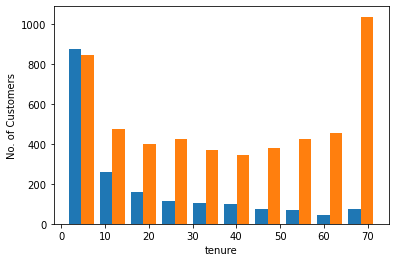

In [27]:
# finding the tenure, customers not leaving company and leaving company:

tenure_churn_no = customer_data[customer_data.Churn=='No'].tenure  

tenure_churn_yes = customer_data[customer_data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("No. of Customers")

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes','Churn=No'])

Customers having long term relationship with the company are not leaving.

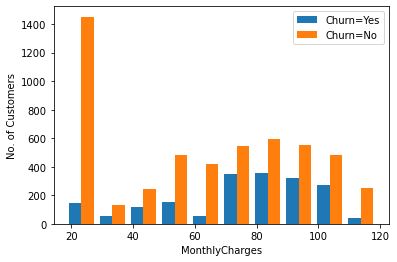

In [28]:
# finding the MonthlyCharges, customers not leaving company and leaving company:

tenure_churn_no = customer_data[customer_data.Churn=='No'].MonthlyCharges
tenure_churn_yes = customer_data[customer_data.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("No. of Customers")

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes','Churn=No'])
plt.legend()

There is not too much variation for the Monthlycharges.

Now our next task is to convert all the object type data into numeric one.

In [29]:
# defining a function to print the unique values of different columns:

def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [30]:
print_unique_col_values(customer_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


We can see from the above that Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn  

In MultipleLines,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies columns No Internet Service or No Phone Service is equivalant to No, Replacing all these values into NO.

In [31]:
customer_data.replace('No internet service', 'No', inplace=True)
customer_data.replace('No phone service', 'No', inplace=True)

In [32]:
print_unique_col_values(customer_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


All aforesaid columns are converted into yes and no.

In [33]:
# Converting all Yes with 1 and all No in 0:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [34]:
for col in yes_no_columns:
    customer_data[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [35]:
for col in customer_data:
    print(f'{col}: {customer_data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [36]:
# now, converting gender as Female = 1 and Male = 0:

customer_data['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)
customer_data['gender'].unique()

array([1, 0], dtype=int64)

In [37]:
# now we are left with InternetService, Contract, PaymentMethod columns which required coding:

churn_data = pd.get_dummies(data= customer_data, columns = ['InternetService', 'Contract', 'PaymentMethod'])
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
churn_data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

we have successfully changed the data types of all the columns.

SCALING

In [39]:
# we need to scale 'tenure', 'MonthlyCharges', 'TotalCharges' three columns:

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

churn_data[cols_to_scale]= scaler.fit_transform(churn_data[cols_to_scale])

In [40]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [41]:
# Splitting the data into Target and predictor variables:

X = churn_data.drop('Churn', axis = 'columns')
y = churn_data['Churn']

Correlation matrix and Heatmap:

<AxesSubplot:title={'center':'Correlation with Churn'}>

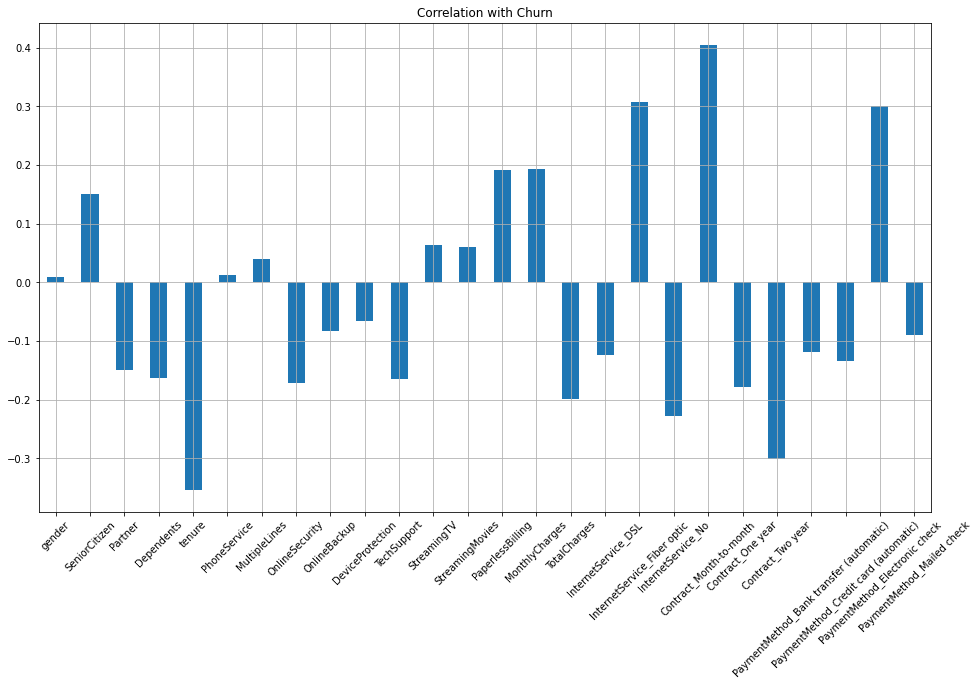

In [42]:
X.corrwith(y).plot.bar(figsize=(16,9), title='Correlation with Churn', rot=45, grid=True)

In [43]:
corr = churn_data.corr()

<AxesSubplot:>

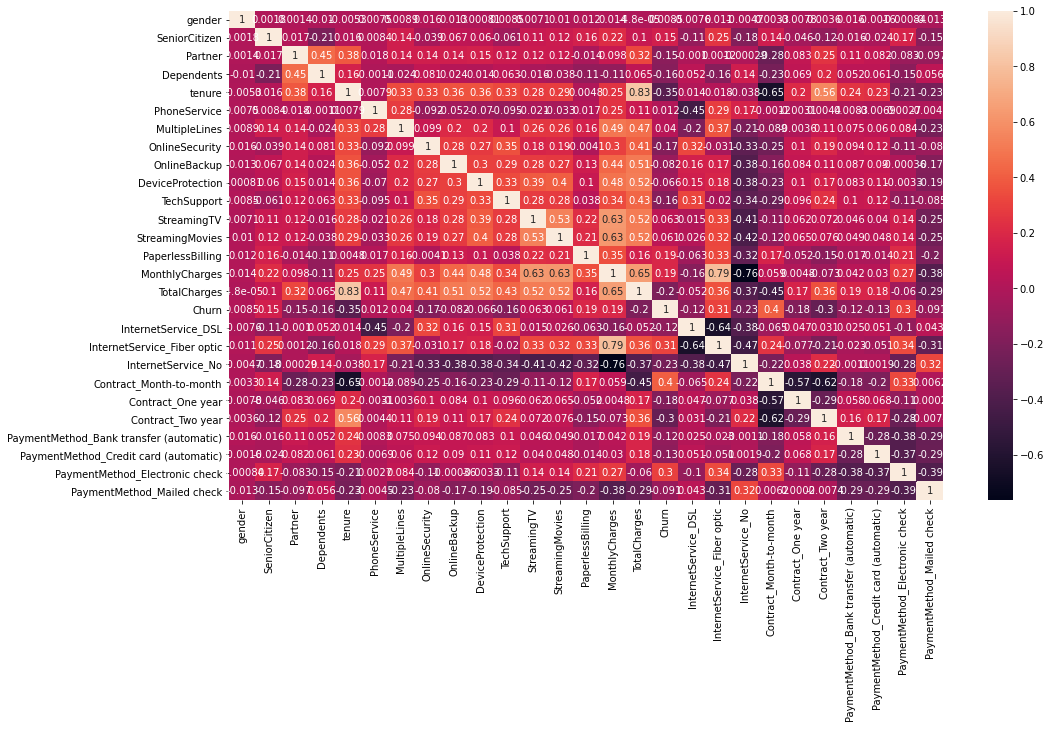

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot= True)

Now, dataset needs to be splitted into training and test datasets:

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [46]:
X_train.shape

(5625, 26)

In [47]:
X_test.shape

(1407, 26)

MODEL BUILDING

1.LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
y_pred = classifier_lr.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [51]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [52]:
results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]], columns = ['Model','Accuracy', 'F1', 'Precesion', 'Recall'])

In [53]:
results

,Model,Accuracy,F1,Precesion,Recall
0,LogisticRegression,0.794598,0.612081,0.676558,0.558824


In [54]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[890 109]
 [180 228]]


CROSS VALIDATION

In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)

print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 80.46%
Standard Deviation is 1.85%


2.RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_prediction = classifier_rf.predict(X_test)

In [58]:
acc_rfc = accuracy_score(y_test, y_prediction)
f1_rfc = f1_score(y_test, y_prediction)
prec_rfc = precision_score(y_test, y_prediction)
rec_rfc = recall_score(y_test, y_prediction)

In [59]:
results_rfc = pd.DataFrame([['RandomForestClassifier', acc_rfc, f1_rfc, prec_rfc, rec_rfc]], columns = ['Model','Accuracy', 'F1', 'Precesion', 'Recall'])

In [60]:
results_rfc

,Model,Accuracy,F1,Precesion,Recall
0,RandomForestClassifier,0.781095,0.564972,0.666667,0.490196


In [61]:
cm_rfc = confusion_matrix(y_test,y_prediction)
print(cm_rfc)

[[899 100]
 [208 200]]


In [62]:
from sklearn.model_selection import cross_val_score
accuracies_rfc = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)

print("Accuracy is {:.2f}%".format(accuracies_rfc.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies_rfc.std()*100))

Accuracy is 79.16%
Standard Deviation is 1.54%


3. GRADIENT BOOST CLASSIFIER

In [63]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [64]:
gdc_model = GradientBoostingClassifier(learning_rate=0.01, random_state=41)
gdc_model.fit(X_train, y_train)
y_pred_gcd = gdc_model.predict(X_test)

In [65]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gcd))

Accuracy: 0.7469793887704336


In [66]:
acc_gdc = accuracy_score(y_test, y_pred_gcd)
f1_gdc = f1_score(y_test, y_pred_gcd)
prec_gdc = precision_score(y_test, y_pred_gcd)
rec_gdc = recall_score(y_test, y_pred_gcd)

In [67]:
results_gdc = pd.DataFrame([['GradientBoostingClassifier', acc_gdc, f1_gdc, prec_gdc, rec_gdc]], columns = ['Model','Accuracy', 'F1', 'Precesion', 'Recall'])

In [68]:
results_gdc

,Model,Accuracy,F1,Precesion,Recall
0,GradientBoostingClassifier,0.746979,0.330827,0.709677,0.215686


In [69]:
cm_gdc = confusion_matrix(y_test,y_pred_gcd)
print(cm_gdc)

[[963  36]
 [320  88]]


In [70]:
accuracies_gdc = cross_val_score(estimator = gdc_model, X = X_train, y = y_train, cv = 10)

print("Accuracy is {:.2f}%".format(accuracies_gdc.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies_gdc.std()*100))

Accuracy is 77.71%
Standard Deviation is 1.49%


From above analysis we conclude that Logistic Regression is the best fit.